# Hidden Markov Model for Text Generation

## Importing Libraries and Initial Setup

In this section, we import the necessary libraries and download required NLTK data. This sets up our environment for text processing and analysis.

In [1]:
!pip -q install markovify

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import random
import re
import warnings
import markovify

warnings.filterwarnings('ignore')

nltk.download('punkt_tab')
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Data Import and Preprocessing

Here, we import Shakespeare's texts from the NLTK Gutenberg corpus and perform initial text cleaning. This prepares our data for the Hidden Markov Model.

In [3]:
# Import novels as text objects
hamlet = gutenberg.raw('shakespeare-hamlet.txt')
macbeth = gutenberg.raw('shakespeare-macbeth.txt')
caesar = gutenberg.raw('shakespeare-caesar.txt')

# Utility function for text cleaning
def text_cleaner(text):
    text = re.sub(r'--', ' ', text)
    text = re.sub('[\[].*?[\]]', '', text)
    text = re.sub(r'(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b','', text)
    text = ' '.join(text.split())
    return text

# Remove chapter indicators and apply cleaning function
for play in [hamlet, macbeth, caesar]:
    play = re.sub(r'Chapter \d+', '', play)
    play = text_cleaner(play)

# Print first 100 characters of each cleaned play
print('\nHamlet:\n', hamlet[:100])
print('\nMacbeth:\n', macbeth[:100])
print('\nJulius Caesar:\n', caesar[:100])


Hamlet:
 [The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo a

Macbeth:
 [The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lig

Julius Caesar:
 [The Tragedie of Julius Caesar by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Fla


## Text Parsing with SpaCy

In this step, we use SpaCy to parse the cleaned texts. This allows for more advanced natural language processing tasks.

In [4]:
# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Parse cleaned novels
hamlet_doc = nlp(hamlet)
macbeth_doc = nlp(macbeth)
caesar_doc = nlp(caesar)

# Combine sentences from all plays
shakespeare_sents = ' '.join([sent.text for doc in [hamlet_doc, macbeth_doc, caesar_doc]
                              for sent in doc.sents if len(sent.text) > 1])

# Inspect the combined text
print(shakespeare_sents[:500])  # Print first 500 characters

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

 Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. No


## Building the Markov Chain Model

Now we create the Markov Chain model using the markovify library. This is the core of our Hidden Markov Model for text generation.

In [5]:
# Create the Markov Chain model
model = markovify.Text(shakespeare_sents, state_size=2)

# Function to generate text using the model
def generate_text(model, num_sentences=10):
    return '\n'.join([model.make_sentence() for _ in range(num_sentences)])

# Generate text
generated_text = generate_text(model)
print("Generated Text:")
print(generated_text)

Generated Text:
But since he went without their helpe; And to the graue did not marke it.
Sirrha, a word with you.
They say he parted well, and I will forestall their repaire hither, and we can let this same day Must end that worke, the Ides of March begun.
Yes Cassius, and from henceforth When you do meet Horatio and Marcellus, the Riuals of my heart too Cassi.
I sir, to be honest as this Becomes the Field, but heere shewes much amis.
I like thy wit well in health, and that presently They haue Letters of the Ayre, invulnerable, And our affaires from England What is a peerelesse Kinsman.
Those precious Motiues, those strong knots of Loue, May sweepe to my braines, They had begun the Play.
Looke Lucius, heere's the booke I sought for so: I do beseech yee, if you know, That I in forgery of shapes and trickes, Come short of what might you think?
But of that Philosophy, By which I would not haue it thus set downe: For you your selfe So well thy words become thee, as thy purse can buy; But 

## Text Analysis Functions

These functions will help us analyze and compare the original and generated texts.

In [6]:
def analyze_text(text, title):
    words = word_tokenize(text.lower())
    word_freq = Counter(words)

    # Word frequency
    plt.figure(figsize=(6, 3))
    word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])
    word_freq_df = word_freq_df.sort_values('frequency', ascending=False)[:20]
    sns.barplot(x=word_freq_df.index, y='frequency', data=word_freq_df)
    plt.title(f"Top 20 Word Frequencies - {title}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Sentence length distribution
    sentences = sent_tokenize(text)
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    plt.figure(figsize=(5, 3))
    sns.histplot(sentence_lengths, kde=True)
    plt.title(f"Distribution of Sentence Lengths - {title}")
    plt.xlabel("Sentence Length (words)")
    plt.ylabel("Frequency")
    plt.show()

def compare_texts(original, generated):
    original_words = word_tokenize(original.lower())
    generated_words = word_tokenize(generated.lower())

    original_bigrams = list(nltk.bigrams(original_words))
    generated_bigrams = list(nltk.bigrams(generated_words))

    original_bigram_freq = Counter(original_bigrams)
    generated_bigram_freq = Counter(generated_bigrams)

    common_bigrams = set(original_bigram_freq.keys()) & set(generated_bigram_freq.keys())

    plt.figure(figsize=(6, 3))
    plt.scatter(
        [original_bigram_freq[bg] for bg in common_bigrams],
        [generated_bigram_freq[bg] for bg in common_bigrams],
        alpha=0.1
    )
    plt.title("Comparison of Bigram Frequencies")
    plt.xlabel("Original Text")
    plt.ylabel("Generated Text")
    plt.plot([0, max(original_bigram_freq.values())], [0, max(original_bigram_freq.values())], 'r--')
    plt.show()

def evaluate_model(original, generated):
    original_words = set(word_tokenize(original.lower()))
    generated_words = set(word_tokenize(generated.lower()))

    vocabulary_overlap = len(original_words & generated_words) / len(original_words)

    print(f"Vocabulary Overlap: {vocabulary_overlap:.2%}")

    # Unique sentence ratio
    original_sentences = set(sent_tokenize(original))
    generated_sentences = set(sent_tokenize(generated))
    unique_ratio = len(generated_sentences) / len(generated_sentences.union(original_sentences))

    print(f"Unique Sentence Ratio: {unique_ratio:.2%}")

## Analyzing and Comparing Texts

Finally, we use our analysis functions to compare the original Shakespeare text with the generated text, providing insights into the performance of our Markov Chain model.

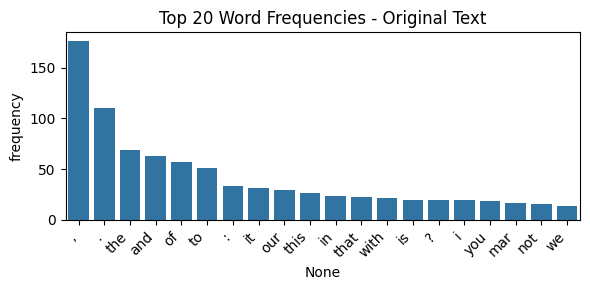

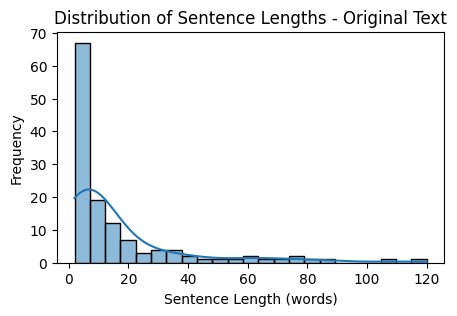

In [7]:
# Analyze original and generated text
analyze_text(shakespeare_sents[:10000], "Original Text")  # Analyze first 10000 characters for brevity

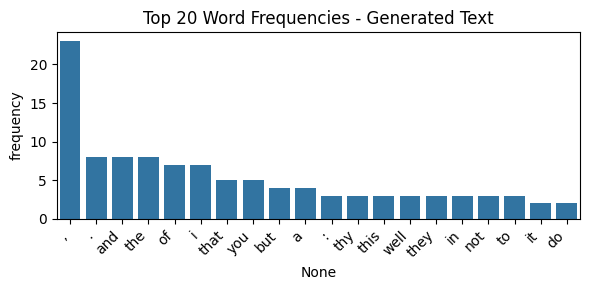

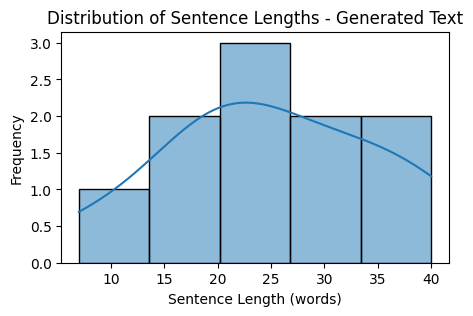

In [8]:
analyze_text(generated_text, "Generated Text")

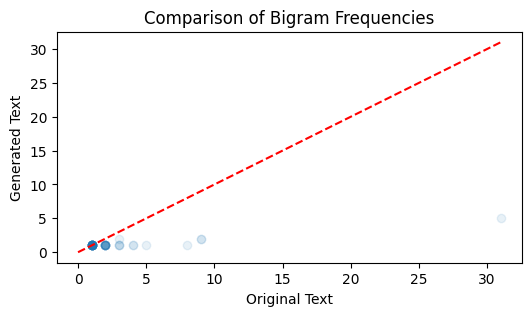

Vocabulary Overlap: 1.87%
Unique Sentence Ratio: 0.22%


In [9]:
# Compare original and generated texts
compare_texts(shakespeare_sents[:10000], generated_text)

# Evaluate the model
evaluate_model(shakespeare_sents, generated_text)

This structured approach demonstrates the process of applying a Hidden Markov Model (implemented through the Markov Chain) for text generation, from data preparation to model evaluation.